### Polynomial Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('./data/usitc/tradeVariables-mxcan.csv')
dataset.shape

(24, 5)

In [3]:
dataset.head()

,year,exports,imports,travel_mx,travel_can
0,1996,5.468587e+10,7.296319e+10,276751448,153038903
1,1997,6.839322e+10,8.587234e+10,348661488,145512710
2,1998,7.536930e+10,9.470867e+10,366296614,142291790
3,1999,8.138074e+10,1.100000e+11,391959396,146497328
4,2000,1.000000e+11,1.360000e+11,392231869,147789673


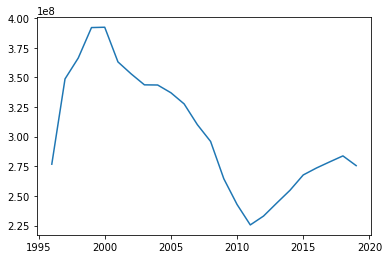

In [54]:
#travel visualization
plt.plot(dataset["year"],dataset["travel_mx"])

In [4]:
newdf = dataset[["exports","imports","travel_mx"]].copy()
newdf.shape

(24, 3)

In [5]:
newdf.tail()

,exports,imports,travel_mx
19,1.860000e+11,2.960000e+11,267663436
20,1.770000e+11,2.940000e+11,273532405
21,1.870000e+11,3.130000e+11,278703002
22,2.040000e+11,3.460000e+11,283743197
23,1.960000e+11,3.580000e+11,275538145


In [31]:
X = newdf.iloc[:, :-2].values
y = newdf.iloc[:, 2].values

In [32]:
# matrix
print(X.shape) 

(24, 1)


In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [34]:
# Fitting linear regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
# Fitting polynomial regression to the dataset
# Note the new class that will be imported
from sklearn.preprocessing import PolynomialFeatures

# new matrix of features, x poly, and x^2 - x^n
# it will transform x into a new matrix
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)

# create a new linear regression object
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

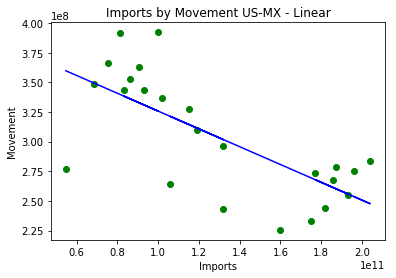

In [44]:
# Visualizing the linear regression results
plt.scatter(X, y, color="green")
plt.plot(X, lin_reg.predict(X), color="blue")
plt.title("Imports by Movement US-MX - Linear")
plt.xlabel("Imports")
plt.ylabel("Movement")
plt.show()

#Insight: linear regression doesn't work well here

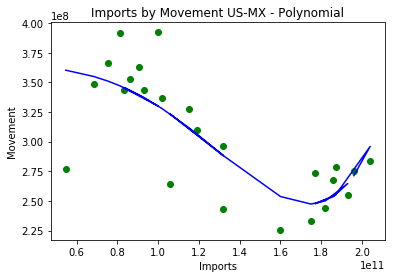

In [67]:
# Visualizing the Polynomial Regression Results
plt.scatter(X, y, color="green")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color="blue")
plt.title("Imports by Movement US-MX - Polynomial")
plt.xlabel("Imports")
plt.ylabel("Movement")
plt.show()

In [69]:
# Predicting the results for the average import levels: 2.07
dataset["imports"].describe()

count    2.400000e+01
mean     2.077727e+11
std      8.632668e+10
min      7.296319e+10
25%      1.357500e+11
50%      2.045000e+11
75%      2.842500e+11
max      3.580000e+11
Name: imports, dtype: float64

In [73]:
# Linear Option
lin_reg.predict([[2.077727e+11]])

array([2.44807907e+08])

In [75]:
# Polynomial Option
lin_reg_2.predict(poly_reg.fit_transform([[2.077727e+11]]))

array([3.11393762e+08])

## Extracting datapoints from figures

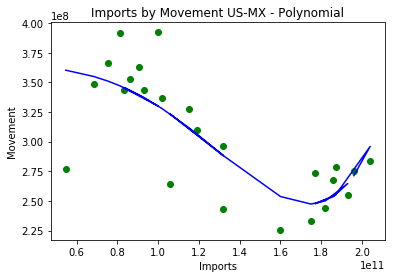

In [84]:
# Visualizing the Polynomial Regression Results
plt.scatter(X, y, color="green")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color="blue")
plt.title("Imports by Movement US-MX - Polynomial")
plt.xlabel("Imports")
plt.ylabel("Movement")
plt.show()

array([4, 5, 6])

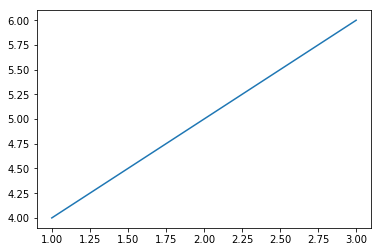

In [87]:
plt.plot([1,2,3],[4,5,6])
ax = plt.gca() # get axis handle
line = ax.lines[0] # get the first line, there might be more

line.get_ydata()


In [88]:
line.get_xydata()

array([[1., 4.],
       [2., 5.],
       [3., 6.]])

array([[5.46858652e+10, 3.60233718e+08],
       [6.83932194e+10, 3.54919718e+08],
       [7.53693001e+10, 3.51025369e+08],
       [8.13807402e+10, 3.46953844e+08],
       [1.00000000e+11, 3.29953373e+08],
       [9.05374338e+10, 3.39422483e+08],
       [8.60760818e+10, 3.43294424e+08],
       [8.31080960e+10, 3.45656988e+08],
       [9.30177032e+10, 3.37103886e+08],
       [1.02000000e+11, 3.27741221e+08],
       [1.15000000e+11, 3.11784683e+08],
       [1.19000000e+11, 3.06416598e+08],
       [1.32000000e+11, 2.88170208e+08],
       [1.06000000e+11, 3.23110102e+08],
       [1.32000000e+11, 2.88170208e+08],
       [1.60000000e+11, 2.53707168e+08],
       [1.75000000e+11, 2.47333949e+08],
       [1.82000000e+11, 2.50029862e+08],
       [1.93000000e+11, 2.64651056e+08],
       [1.86000000e+11, 2.53716243e+08],
       [1.77000000e+11, 2.47660866e+08],
       [1.87000000e+11, 2.54912471e+08],
       [2.04000000e+11, 2.95921534e+08],
       [1.96000000e+11, 2.71323550e+08]])

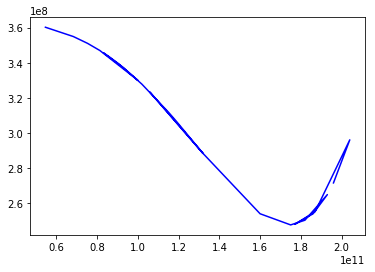

In [90]:
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color="blue")
ax = plt.gca() # get axis handle
line = ax.lines[0] # get the first line, there might be more

line.get_xydata()
